In [2]:
# import packages
import numpy as np
import pandas as pd
##from tools import FeatureEngineer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_datareader as pdr
import os

from ta.momentum import AwesomeOscillatorIndicator, KAMAIndicator, PercentagePriceOscillator
from ta.momentum import PercentageVolumeOscillator, ROCIndicator
from ta.momentum import RSIIndicator, StochRSIIndicator, StochasticOscillator
from ta.momentum import TSIIndicator, UltimateOscillator, WilliamsRIndicator
from ta.volume import AccDistIndexIndicator, ChaikinMoneyFlowIndicator
from ta.volume import EaseOfMovementIndicator, MFIIndicator
from ta.volume import NegativeVolumeIndexIndicator, OnBalanceVolumeIndicator, VolumePriceTrendIndicator
from ta.volatility import AverageTrueRange, BollingerBands, DonchianChannel, KeltnerChannel, UlcerIndex
from ta.trend import ADXIndicator, EMAIndicator, MACD, MassIndex, PSARIndicator
from ta.trend import STCIndicator, TRIXIndicator, WMAIndicator, VortexIndicator
from ta.others import CumulativeReturnIndicator, DailyLogReturnIndicator, DailyReturnIndicator

class FeatureEngineer():

    # add new features
    def build_technical_indicators(self, df):
        
        df['open_sub_close'] = df['Open'] - df['Close']
        df['high_div_low'] = df['High'] / df['Low']

        # MA8, 21, 50, 200 - volume
        df['ma8_vol'] = df['Volume'].rolling(8).mean()
        df['ma21_vol'] = df['Volume'].rolling(21).mean()
        df['ma50_vol'] = df['Volume'].rolling(50).mean()
        df['ma200_vol'] = df['Volume'].rolling(200).mean()
        
        
        
        # momentum indicators
        moment_aoi = AwesomeOscillatorIndicator(df['High'], df['Low'])
        df['AO'] = moment_aoi.awesome_oscillator()
        
        moment_kama = KAMAIndicator(df['Close']) # Kaufman's Adaptive Moving Average
        df['KAMA'] = moment_kama.kama()
        
        moment_ppo = PercentagePriceOscillator(df['Close'])
        df['PPO'], df['PPO_signal'] = moment_ppo.ppo(), moment_ppo.ppo_signal()
        
        moment_pvo = PercentageVolumeOscillator(df['Volume'])
        df['PVO'], df['PVO_signal'] = moment_pvo.pvo(), moment_pvo.pvo_signal()
        
        moment_roc = ROCIndicator(df['Close']) # Rate of Change
        df['ROC'] = moment_roc.roc()
        
        moment_rsi = RSIIndicator(df['Close']) # Relative Strength Index
        df['RSI'] = moment_rsi.rsi()
        
        moment_rsi_ = StochRSIIndicator(df['Close'])
        df['RSI_stoch'] = moment_rsi_.stochrsi()
        df['RSI_stoch_d'] = moment_rsi_.stochrsi_d()
        df['RSI_stoch_k'] = moment_rsi_.stochrsi_k()
        
        moment_stoch = StochasticOscillator(df['Close'], df['High'], df['Low'])
        df['stoch'], df['stoch_signal'] = moment_stoch.stoch(), moment_stoch.stoch_signal()
        
        moment_tsi = TSIIndicator(df['Close']) # True Strength Index
        df['TSI'] = moment_tsi.tsi()
        
        moment_ult = UltimateOscillator(df['High'], df['Low'], df['Close'])
        df['ult'] = moment_ult.ultimate_oscillator()
        
        moment_wri = WilliamsRIndicator(df['High'], df['Low'], df['Close']) # Williams %R
        df['WRI'] = moment_wri.williams_r()
        
        
        
        # volume indicators
        vol_adi = AccDistIndexIndicator(df['High'], df['Low'], df['Close'], df['Volume']) # Accumulation/Distribution Index
        df['ADI'] = vol_adi.acc_dist_index()
        
        vol_cmf = ChaikinMoneyFlowIndicator(df['High'], df['Low'], df['Close'], df['Volume'])
        df['CMF'] = vol_cmf.chaikin_money_flow()
        
        vol_eom = EaseOfMovementIndicator(df['High'], df['Low'], df['Volume'])
        df['EoM'], df['EoM_signal'] = vol_eom.ease_of_movement(), vol_eom.sma_ease_of_movement()
        
        vol_mfi = MFIIndicator(df['High'], df['Low'], df['Close'], df['Volume']) # Money Flow Index
        df['MFI'] = vol_mfi.money_flow_index()
        
        vol_nvi = NegativeVolumeIndexIndicator(df['Close'], df['Volume'])
        df['NVI'] = vol_nvi.negative_volume_index()
        
        vol_obv = OnBalanceVolumeIndicator(df['Close'], df['Volume'])
        df['OBV'] = vol_obv.on_balance_volume()
        
        vol_vpt = VolumePriceTrendIndicator(df['Close'], df['Volume'])
        df['VPT'] = vol_vpt.volume_price_trend()
        
        
        
        # volatility indicators
        vola_atr = AverageTrueRange(df['High'], df['Low'], df['Close'])
        df['ATR'] = vola_atr.average_true_range()
        
        vola_boll = BollingerBands(df['Close'])
        df['BOLL+'] = vola_boll.bollinger_hband()
        df['BOLL-'] = vola_boll.bollinger_lband()
        df['BOLL_mid'] = vola_boll.bollinger_mavg()
        df['BOLL_percent'] = vola_boll.bollinger_pband()
        df['BOLL_width'] = vola_boll.bollinger_wband()
        
        vola_dc = DonchianChannel(df['High'], df['Low'], df['Close'])
        df['DC+'] = vola_dc.donchian_channel_hband()
        df['DC-'] = vola_dc.donchian_channel_lband()
        df['DC_mid'] = vola_dc.donchian_channel_mband()
        df['DC_percent'] = vola_dc.donchian_channel_pband()
        df['DC_width'] = vola_dc.donchian_channel_wband()
        
        vola_kc = KeltnerChannel(df['High'], df['Low'], df['Close'])
        df['KC+'] = vola_kc.keltner_channel_hband()
        df['KC-'] = vola_kc.keltner_channel_lband()
        df['KC_mid'] = vola_kc.keltner_channel_mband()
        df['KC_percent'] = vola_kc.keltner_channel_pband()
        df['KC_width'] = vola_kc.keltner_channel_wband()
        
        vola_ui = UlcerIndex(df['Close'])
        df['Ulcer'] = vola_ui.ulcer_index()
        
        
        
        # trend indicators
        trend_adx = ADXIndicator(df['High'], df['Low'], df['Close']) 
        df['ADX'], df['ADX+'], df['ADX-'] = trend_adx.adx(), trend_adx.adx_pos(), trend_adx.adx_neg()
        
        df['ema7_price'] = EMAIndicator(df['Close'], 7).ema_indicator() # EMA7
        df['ema21_price'] = EMAIndicator(df['Close'], 21).ema_indicator() # EMA21
        df['ema50_price'] = EMAIndicator(df['Close'], 50).ema_indicator() # EMA50
        df['ema200_price'] = EMAIndicator(df['Close'], 200).ema_indicator() # EMA200
        
        trend_macd = MACD(df['Close']) # MACD
        df['MACD'], df['MACD_signal'] = trend_macd.macd(), trend_macd.macd_signal()
        
        trend_mass_index = MassIndex(df['High'], df['Low']) 
        df['MI'] = trend_mass_index.mass_index()
        
        trend_psar = PSARIndicator(df['High'], df['Low'], df['Close']) # Parabolic Stop and Reverse 
        df['PSAR'], df['PSAR+'], df['PSAR-'] = trend_psar.psar(), trend_psar.psar_up(), trend_psar.psar_down()
        
        trend_stc = STCIndicator(df['Close']) # Schaff Trend Cycle
        df['STC'] = trend_stc.stc()
        
        trend_trix = TRIXIndicator(df['Close']) # Trix
        df['TRIX'] = trend_trix.trix()
        
        trend_vi = VortexIndicator(df['High'], df['Low'], df['Close'])
        df['VI'] = trend_vi.vortex_indicator_diff()
        df['VI+'] = trend_vi.vortex_indicator_pos()
        df['VI-'] = trend_vi.vortex_indicator_neg()
        
        trend_wma = WMAIndicator(df['Close']) # Weighted Moving Average
        df['WMA'] = trend_wma.wma()
        
        
        
        # others indicators
        other_cr = CumulativeReturnIndicator(df['Close'])
        df['CR'] = other_cr.cumulative_return()
        other_dlr = DailyLogReturnIndicator(df['Close'])
        df['DLR'] = other_dlr.daily_log_return()
        other_dr = DailyReturnIndicator(df['Close'])
        df['DR'] = other_dr.daily_return()
        
        return df



    def import_external_data():

        # commodity
        gc = pdr.get_data_yahoo('GC=F', start, end) # gold
        sil = pdr.get_data_yahoo('SI=F', start, end) # silver
        oil = pdr.get_data_yahoo('CL=F', start, end) # crude oil

        # dollar and bond
        dollar = pdr.get_data_yahoo('EURUSD=X', start, end) # EUR/USD
        bond = pdr.get_data_yahoo('^TNX', start, end) # 10-year treasury bond

        # futures 22
        wheat = pdr.get_data_yahoo('ZWH22.CBT', start, end) # wheat
        corn = pdr.get_data_yahoo('ZCH22.CBT', start, end) # corn
        soy = pdr.get_data_yahoo('ZSH22.CBT', start, end) # soybean
        oat = pdr.get_data_yahoo('ZOH22.CBT', start, end) # oat
        usd = pdr.get_data_yahoo('DXH22.NYB', start, end) # USD

        # stock market
        spy = pdr.get_data_yahoo('SPY', start, end) # SPY
        dia = pdr.get_data_yahoo('DIA', start, end) # DIA
        qqq = pdr.get_data_yahoo('QQQ', start, end) # QQQ
        iwm = pdr.get_data_yahoo('IWM', start, end) # russell
        vix = pdr.get_data_yahoo('^VIX', start, end) # VIX
        bkch = pdr.get_data_yahoo('BKCH', start, end) # blockchain etf

In [6]:
# load and prepare data
bnb = pd.read_csv('/Users/umay/Desktop/bnb.csv') # load data
bnb = bnb.sample(n=10000, replace=False, random_state=1) # 10000 samples
tool = FeatureEngineer()
bnb = tool.build_technical_indicators(bnb) # construct technical indicators
bnb.drop(columns=['KAMA', 'PSAR+', 'PSAR-'], inplace=True) # drop columns with too many NAs
bnb.dropna(axis=0, inplace=True) # drop rows contain missing
r = bnb.index[np.isinf(bnb).any(1)]
bnb.drop([i for i in r], axis=0, inplace=True) # drop rows contain infinity

In [7]:
# set parameters
split_ratio = 0.2
scaler = MinMaxScaler()
x = bnb.drop(columns=['Target', 'Open', 'High', 'Low'])
y = bnb['Target']
clf = RandomForestRegressor()

In [8]:
# train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_ratio, random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 3.0033864853099684e-05


In [9]:
# check feature importance
clf.feature_importances_

array([0.03375856, 0.03095087, 0.02106016, 0.01064667, 0.03329085,
       0.01371276, 0.02653858, 0.05287333, 0.01359746, 0.01549199,
       0.01744183, 0.0187218 , 0.01263142, 0.00837183, 0.0067776 ,
       0.01642135, 0.01286014, 0.02139681, 0.00567311, 0.00995894,
       0.02140224, 0.01082155, 0.01459129, 0.01391734, 0.00674435,
       0.01946257, 0.00720363, 0.01213758, 0.01899219, 0.01174085,
       0.02036005, 0.01776338, 0.00072223, 0.01267157, 0.00949542,
       0.01694902, 0.00950384, 0.01208836, 0.00399603, 0.0105896 ,
       0.01192425, 0.00691906, 0.01805783, 0.00844375, 0.00978595,
       0.01250078, 0.00419903, 0.00504886, 0.00456236, 0.01203604,
       0.01300006, 0.01547187, 0.0141582 , 0.00727525, 0.01065667,
       0.00976106, 0.00643216, 0.01027161, 0.01824707, 0.00848273,
       0.00873727, 0.01532943, 0.02415838, 0.01379039, 0.00889529,
       0.0144038 , 0.01400396, 0.01664935, 0.01041337, 0.01332772,
       0.00973213, 0.00999515])

In [17]:

fea_label =range(len(clf.feature_importances_))

In [28]:
feat_importances = pd.Series(clf.feature_importances_,index=fea_label).sort_values(ascending = False)


Text(0.5, 1.0, 'Variable Importances')

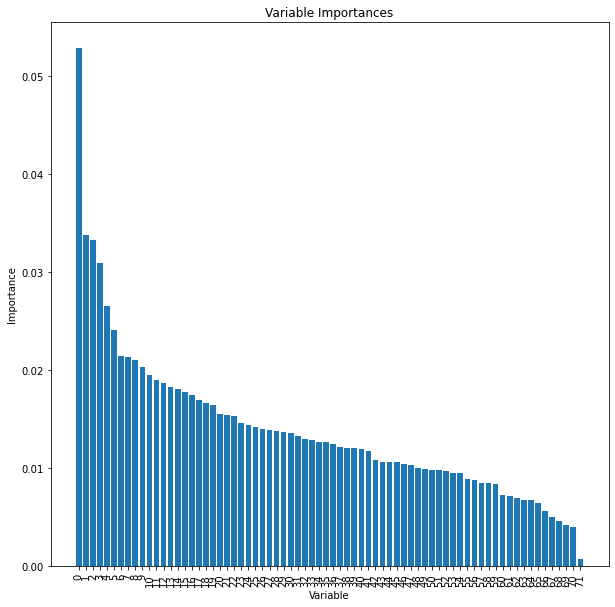

In [29]:
import matplotlib.pyplot as plt
plt.figure(3)
plt.clf()
importance_plot_x_values=list(range(len(feat_importances)))
plt.bar(importance_plot_x_values,feat_importances,orientation='vertical')
plt.xticks(importance_plot_x_values,fea_label,rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')

In [7]:
threshold = 0.01
not_important = {}
important_features = {}
feature_name = [item for item in x.columns]
feature_importance = clf.feature_importances_

In [9]:

for idx, val in enumerate(feature_importance):
    if val > threshold:
        important_features[feature_name[idx]] = round(val, 4)
    else:
        not_important[feature_name[idx]] = round(val, 4)
        
print(important_features)
print()
print(not_important)

{'timestamp': 0.0258, 'Count': 0.0233, 'Volume': 0.0416, 'open_sub_close': 0.0271, 'high_div_low': 0.0472, 'ma8_vol': 0.0163, 'ma21_vol': 0.0174, 'ma50_vol': 0.0178, 'ma200_vol': 0.0271, 'AO': 0.0142, 'PVO': 0.0248, 'PVO_signal': 0.0181, 'ROC': 0.0186, 'RSI_stoch_d': 0.0161, 'RSI_stoch_k': 0.0147, 'stoch': 0.0151, 'stoch_signal': 0.0161, 'ult': 0.0158, 'ADI': 0.0125, 'CMF': 0.0224, 'EoM': 0.0105, 'EoM_signal': 0.0197, 'MFI': 0.0178, 'OBV': 0.0104, 'VPT': 0.0108, 'ATR': 0.0111, 'BOLL-': 0.0116, 'BOLL_percent': 0.011, 'BOLL_width': 0.0135, 'DC-': 0.0188, 'DC_percent': 0.0107, 'DC_width': 0.0138, 'KC_percent': 0.0143, 'KC_width': 0.0143, 'Ulcer': 0.0159, 'ADX': 0.0137, 'ema50_price': 0.0107, 'ema200_price': 0.021, 'MACD': 0.0112, 'MI': 0.0182, 'PSAR': 0.0164, 'STC': 0.0175, 'VI': 0.0199, 'VI+': 0.015, 'VI-': 0.0255, 'WMA': 0.0105, 'DLR': 0.0122, 'DR': 0.0103}

{'Close': 0.0081, 'VWAP': 0.0098, 'PPO': 0.0068, 'PPO_signal': 0.0087, 'RSI': 0.007, 'RSI_stoch': 0.0089, 'TSI': 0.0077, 'WRI': 0.